# Importing Necessary modules

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder

#preprocess.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint,EarlyStopping

# specifically for cnn
from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


# Data Preparation

In [2]:
X = []
Z = []
IMG_SIZE = 224
FLOWER_DAISY_DIR = 'flower_photos/daisy'
FLOWER_SUNFLOWER_DIR = 'flower_photos/sunflowers'
FLOWER_TULIP_DIR = 'flower_photos/tulips'
FLOWER_DANDI_DIR = 'flower_photos/dandelion'
FLOWER_ROSE_DIR = 'flower_photos/roses'

In [3]:
def assign_label(img, flower_type):
    return flower_type

In [4]:
#Getting Train Data
def make_train_data(flower_type, DIR):
    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, flower_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        X.append(np.array(img))
        Z.append(str(label))

In [5]:
make_train_data('Daisy', FLOWER_DAISY_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 633/633 [04:31<00:00,  2.33it/s]

633


In [6]:
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 699/699 [04:15<00:00,  2.73it/s]

1332


In [7]:
make_train_data('Tulip', FLOWER_TULIP_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 799/799 [04:43<00:00,  2.82it/s]

2131


In [8]:
make_train_data('Dandelion', FLOWER_DANDI_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 898/898 [04:59<00:00,  3.00it/s]

3029


In [9]:
make_train_data('Rose', FLOWER_ROSE_DIR)
print(len(X))

100%|████████████████████████████████████████████████████████████████████████████████| 641/641 [03:26<00:00,  3.10it/s]

3670


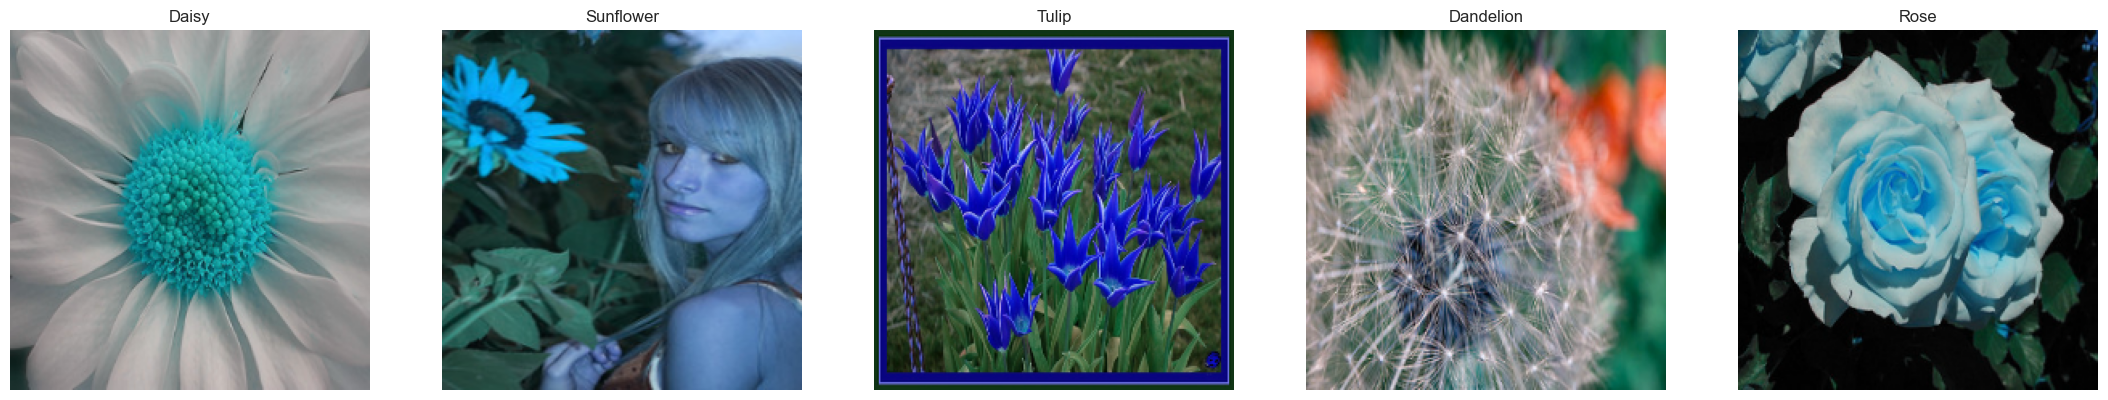

In [21]:
#plotting one of all flower types in data
plt.figure(figsize = (24,24))
for i in range(5):
    img = X[900*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(Z[900*i])

In [22]:
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y, 5)
X = np.array(X)
X = X/255

In [23]:
# Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

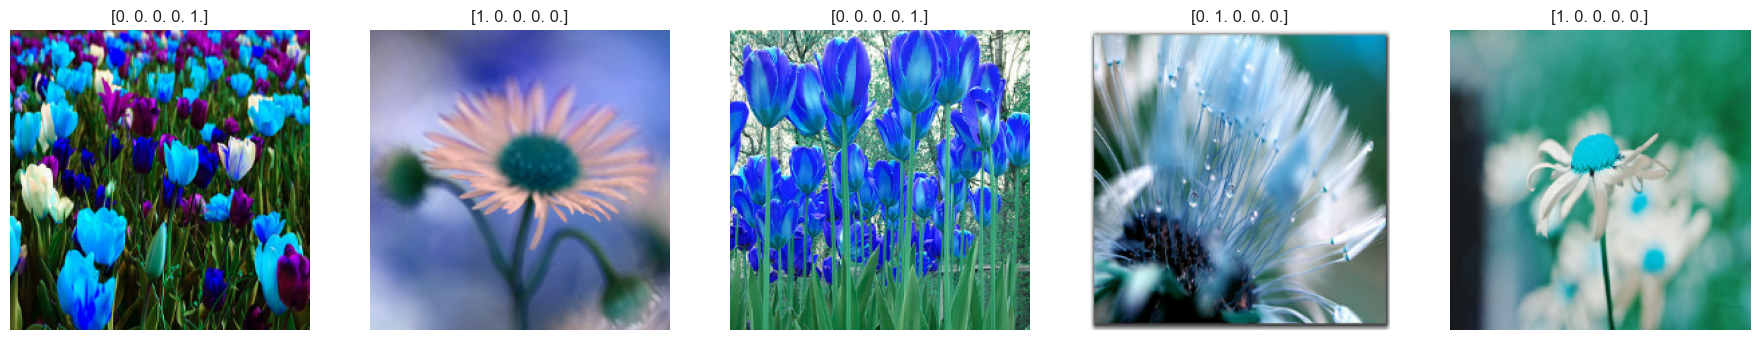

In [24]:
#Plotting random 5 images in train data
plt.figure(figsize = (20,20))
for i in range(5):
    img = x_train[600*i]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(y_train[600*i])
plt.show()

In [25]:
print("X_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("======")
print("X_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (2936, 224, 224, 3)
y_train shape: (2936, 5)
X_test shape: (734, 224, 224, 3)
y_test shape: (734, 5)


# Model Building

In [26]:
# # modelling starts using a CNN.
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3),padding="Same",activation="relu" , input_shape = (IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 2nd Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 3rd Convolutional Layer
model.add(Conv2D(filters=96, kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# 4th Convolutional Layer
model.add(Conv2D(filters=64,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# 5th Convolutional Layer
model.add(Conv2D(filters=32,kernel_size = (3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# 2st Fully Connected Layer
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Add output layer
model.add(Dense(5,activation="softmax"))

model.summary() # print summary my model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001),metrics=['accuracy']) #compile model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 256)    0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 256)    1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 112, 112, 256)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0

In [27]:
batch_size = 32
epochs = 100

red_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.1)

In [28]:
#Create a data augmentation and apply it to x_train data to prevent over-fitting

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=60,  # randomly rotate images in the range (60, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,
    shear_range=0.1,
    fill_mode = "reflect"
    ) 
datagen.fit(x_train)

# Training And Testing The Model

In [29]:
filepath = "ImageModel.hdf5"

checkpoint = ModelCheckpoint(filepath, save_weights_only=False,
                             monitor='val_loss', mode='min', save_best_only=True, verbose=1)

earlyStop =  EarlyStopping(monitor='val_loss', mode='min', patience=30)
callbacks_list = [earlyStop, checkpoint]

History = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(x_test, y_test),
                              verbose=1,
                              callbacks=callbacks_list)

Epoch 1/100
92/92 [==============================] - ETA: 0s - loss: 1.9817 - accuracy: 0.3392 
Epoch 1: val_loss improved from inf to 2.01477, saving model to ImageModel.hdf5
92/92 [==============================] - 1012s 11s/step - loss: 1.9817 - accuracy: 0.3392 - val_loss: 2.0148 - val_accuracy: 0.2221
Epoch 2/100
92/92 [==============================] - ETA: 0s - loss: 1.5310 - accuracy: 0.4135 
Epoch 2: val_loss did not improve from 2.01477
92/92 [==============================] - 1058s 11s/step - loss: 1.5310 - accuracy: 0.4135 - val_loss: 2.6708 - val_accuracy: 0.2221
Epoch 3/100
92/92 [==============================] - ETA: 0s - loss: 1.3642 - accuracy: 0.4435
Epoch 3: val_loss did not improve from 2.01477
92/92 [==============================] - 938s 10s/step - loss: 1.3642 - accuracy: 0.4435 - val_loss: 2.2614 - val_accuracy: 0.2221
Epoch 4/100
92/92 [==============================] - ETA: 0s - loss: 1.2946 - accuracy: 0.4816 
Epoch 4: val_loss improved from 2.01477 to 1.558

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential/max_pooling2d/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Program Files\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Program Files\Python311\Lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Program Files\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 725, in start
      self.io_loop.start()
    File "C:\Program Files\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Program Files\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Program Files\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Program Files\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "C:\Program Files\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "C:\Program Files\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "C:\Program Files\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Program Files\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Program Files\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Program Files\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "C:\Program Files\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "C:\Program Files\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Program Files\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Program Files\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Program Files\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\805925\AppData\Local\Temp\ipykernel_15784\2311911044.py", line 9, in <module>
      History = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
    File "C:\Program Files\Python311\Lib\site-packages\keras\engine\training.py", line 2636, in fit_generator
      return self.fit(
    File "C:\Program Files\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Program Files\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Program Files\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Program Files\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Program Files\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Program Files\Python311\Lib\site-packages\keras\engine\training.py", line 1054, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Program Files\Python311\Lib\site-packages\keras\optimizers\optimizer.py", line 542, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "C:\Program Files\Python311\Lib\site-packages\keras\optimizers\optimizer.py", line 275, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/sequential/max_pooling2d/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[32,224,224,256] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node gradient_tape/sequential/max_pooling2d/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_4564]

In [19]:
print("Test Accuracy: {0:.2f}%".format(model.evaluate(x_test,y_test)[1]*100)) #get score acording to test datas

27/27 [==============================] - 1s 44ms/step - loss: 0.8137 - accuracy: 0.7361
Test Accuracy: 73.61%


# Evaluating The Model

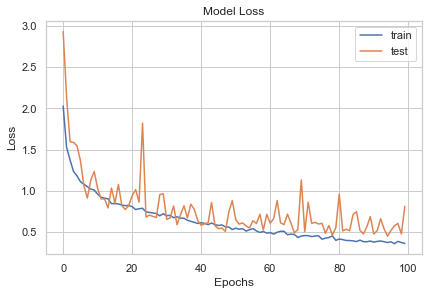

In [20]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

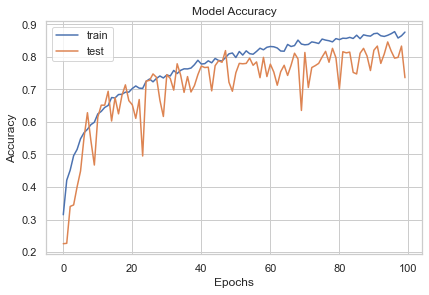

In [21]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [22]:
model.load_weights("ImageModel.hdf5")

loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy:  {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy:  0.9259
Testing Accuracy:  0.8461


Classification Report
              precision    recall  f1-score   support

       Daisy       0.90      0.77      0.83       162
   Sunflower       0.87      0.92      0.90       195
       Tulip       0.70      0.87      0.78       156
   Dandelion       0.89      0.92      0.91       155
        Rose       0.89      0.76      0.82       196

    accuracy                           0.85       864
   macro avg       0.85      0.85      0.85       864
weighted avg       0.85      0.85      0.85       864



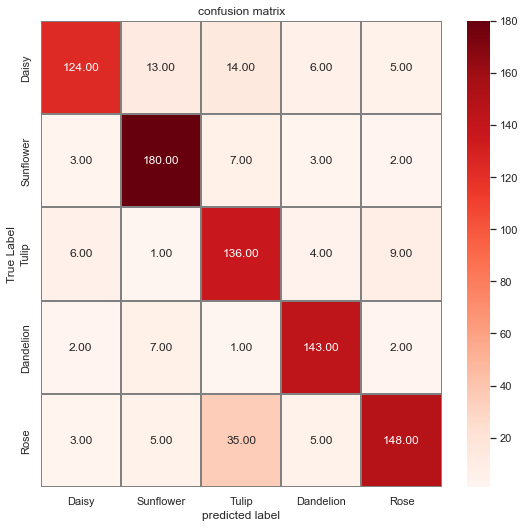

In [30]:
from sklearn.metrics import confusion_matrix,classification_report
# demonstration of calculating metrics for a neural network model using sklearn
# Predict the values from the validation dataset

Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_test,axis = 1)

confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
print('Classification Report')
target_names = ['Daisy', 'Sunflower','Tulip', 'Dandelion','Rose']
print(classification_report(Y_true, Y_pred_classes,target_names=target_names))
plt.figure(figsize = (8,8))
sns.heatmap(confusion_mtx,cmap= "Reds", linecolor = 'gray' , linewidth = 0.01 , annot = True, fmt='.2f' , xticklabels = target_names , yticklabels = target_names)
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

# Visualizing Predictions

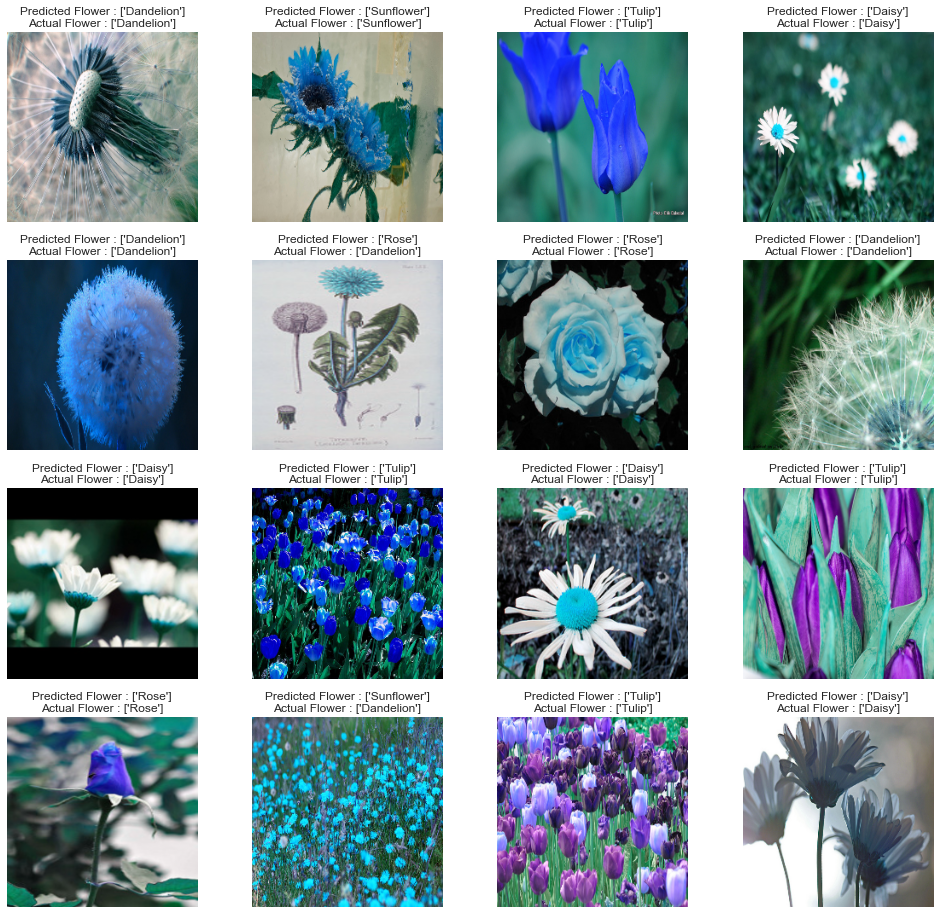

In [62]:
# figure out samples of this data with the true value and predicted ones
plt.figure(figsize=(15,15))
st = 10
for i in range(st,st+16):
    plt.subplot(4,4,i+1-st)
    plt.imshow(x_test[i])
    plt.title("Predicted Flower : "+str(le.inverse_transform([Y_pred_classes[i]]))+"\n"+"Actual Flower : "+str(le.inverse_transform([Y_true[i]])))
    plt.axis('off')

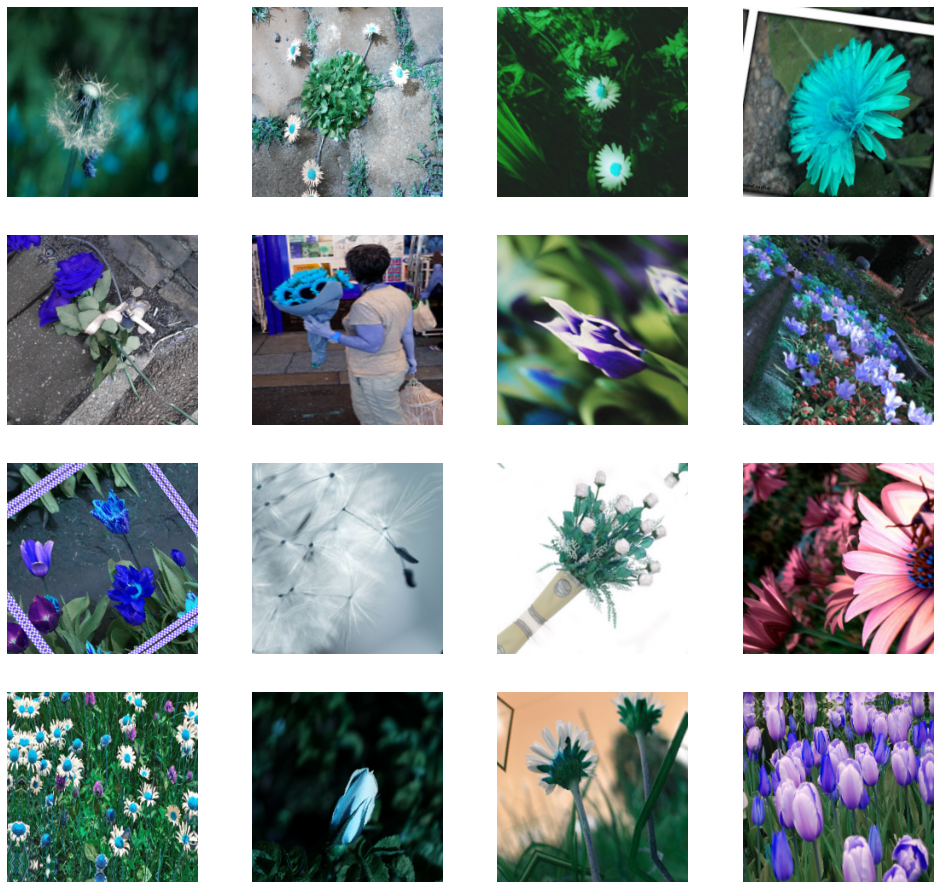

In [31]:
plt.figure(figsize=(15,15))    
for X, Y in datagen.flow(x_train, y_train, batch_size=32):
    for i in range(10, 10+16):
        plt.subplot(4,4,i+1-10)
        plt.imshow(X[i].reshape(224, 224, 3))
        plt.axis('off')    
    break
plt.show()